In [1]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten, BatchNormalization

C:\Users\usuario\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [3]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [5]:
model = Sequential()
model.add(Conv2D(64, kernel_size=5, padding='same', activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        4864      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        51232     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                65568     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total para

In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
from sklearn.model_selection import train_test_split
x75, x25, y75, y25 = train_test_split(x_train, y_train, test_size=0.25, shuffle=True)

In [7]:
batch_size = 64
num_epochs = 10
model.fit(x_train, y_train, batch_size=batch_size, epochs=num_epochs, verbose=1, validation_data=(x25, y25))

Train on 50000 samples, validate on 12500 samples
Epoch 1/10
50000/50000 [==============================] - 257s 5ms/step - loss: 1.6032 - acc: 0.4198 - val_loss: 1.3608 - val_acc: 0.5216
Epoch 2/10
50000/50000 [==============================] - 253s 5ms/step - loss: 1.2367 - acc: 0.5643 - val_loss: 1.1176 - val_acc: 0.6093
Epoch 3/10
50000/50000 [==============================] - 257s 5ms/step - loss: 1.0839 - acc: 0.6209 - val_loss: 0.9756 - val_acc: 0.6641
Epoch 4/10
50000/50000 [==============================] - 254s 5ms/step - loss: 0.9866 - acc: 0.6553 - val_loss: 0.9010 - val_acc: 0.6858
Epoch 5/10
50000/50000 [==============================] - 255s 5ms/step - loss: 0.9157 - acc: 0.6804 - val_loss: 0.8537 - val_acc: 0.7035
Epoch 6/10
50000/50000 [==============================] - 257s 5ms/step - loss: 0.8585 - acc: 0.7007 - val_loss: 0.7758 - val_acc: 0.7303
Epoch 7/10
50000/50000 [==============================] - 256s 5ms/step - loss: 0.8132 - acc: 0.7173 - val_loss: 0.7707 - 

In [8]:
score = model.evaluate(x_test, y_test, verbose=0)
print(score)

[0.8650083960533143, 0.706]


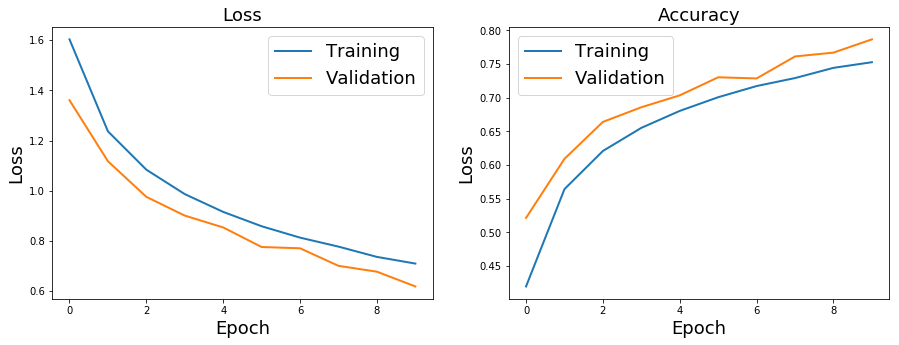

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(model.history.history['loss'], label='Training', linewidth=2)
plt.plot(model.history.history['val_loss'], label='Validation', linewidth=2)
plt.legend(fontsize=18)
plt.title('Loss', fontsize=18)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.subplot(1, 2, 2)
plt.plot(model.history.history['acc'], label='Training', linewidth=2)
plt.plot(model.history.history['val_acc'], label='Validation', linewidth=2)
plt.legend(fontsize=18)
plt.title('Accuracy', fontsize=18)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.show()

In [8]:
batch_size = 4
num_epochs = 10
model.fit(x_train, y_train, batch_size=batch_size, epochs=num_epochs, verbose=1, validation_data=(x25, y25))

Train on 50000 samples, validate on 12500 samples
Epoch 1/10
50000/50000 [==============================] - 329s 7ms/step - loss: 1.5516 - acc: 0.4296 - val_loss: 1.3560 - val_acc: 0.5139
Epoch 2/10
50000/50000 [==============================] - 318s 6ms/step - loss: 1.2094 - acc: 0.5709 - val_loss: 1.0957 - val_acc: 0.6170
Epoch 3/10
50000/50000 [==============================] - 309s 6ms/step - loss: 1.0953 - acc: 0.6159 - val_loss: 0.9769 - val_acc: 0.6599
Epoch 4/10
50000/50000 [==============================] - 299s 6ms/step - loss: 1.0279 - acc: 0.6409 - val_loss: 0.9126 - val_acc: 0.6810
Epoch 5/10
50000/50000 [==============================] - 309s 6ms/step - loss: 0.9740 - acc: 0.6612 - val_loss: 0.8851 - val_acc: 0.6908
Epoch 6/10
50000/50000 [==============================] - 293s 6ms/step - loss: 0.9330 - acc: 0.6765 - val_loss: 0.8493 - val_acc: 0.7067
Epoch 7/10
50000/50000 [==============================] - 298s 6ms/step - loss: 0.9024 - acc: 0.6860 - val_loss: 0.8300 - 

In [9]:
batch_size = 16
num_epochs = 10
model.fit(x_train, y_train, batch_size=batch_size, epochs=num_epochs, verbose=1, validation_data=(x25, y25))

Train on 50000 samples, validate on 12500 samples
Epoch 1/10
50000/50000 [==============================] - 264s 5ms/step - loss: 0.6731 - acc: 0.7649 - val_loss: 0.6387 - val_acc: 0.7787
Epoch 2/10
50000/50000 [==============================] - 269s 5ms/step - loss: 0.6651 - acc: 0.7659 - val_loss: 0.6252 - val_acc: 0.7802
Epoch 3/10
50000/50000 [==============================] - 256s 5ms/step - loss: 0.6483 - acc: 0.7713 - val_loss: 0.5946 - val_acc: 0.7894
Epoch 4/10
50000/50000 [==============================] - 256s 5ms/step - loss: 0.6284 - acc: 0.7801 - val_loss: 0.5956 - val_acc: 0.7905
Epoch 5/10
50000/50000 [==============================] - 262s 5ms/step - loss: 0.6138 - acc: 0.7836 - val_loss: 0.5868 - val_acc: 0.7885
Epoch 6/10
50000/50000 [==============================] - 257s 5ms/step - loss: 0.5978 - acc: 0.7920 - val_loss: 0.5451 - val_acc: 0.8081
Epoch 7/10
50000/50000 [==============================] - 263s 5ms/step - loss: 0.5892 - acc: 0.7938 - val_loss: 0.5391 - 

In [10]:
batch_size = 128
num_epochs = 10
model.fit(x_train, y_train, batch_size=batch_size, epochs=num_epochs, verbose=1, validation_data=(x25, y25))

Train on 50000 samples, validate on 12500 samples
Epoch 1/10
50000/50000 [==============================] - 257s 5ms/step - loss: 0.4515 - acc: 0.8456 - val_loss: 0.4285 - val_acc: 0.8524
Epoch 2/10
50000/50000 [==============================] - 270s 5ms/step - loss: 0.4356 - acc: 0.8527 - val_loss: 0.4209 - val_acc: 0.8550
Epoch 3/10
50000/50000 [==============================] - 299s 6ms/step - loss: 0.4300 - acc: 0.8549 - val_loss: 0.4178 - val_acc: 0.8568
Epoch 4/10
50000/50000 [==============================] - 267s 5ms/step - loss: 0.4266 - acc: 0.8558 - val_loss: 0.4079 - val_acc: 0.8603
Epoch 5/10
50000/50000 [==============================] - 282s 6ms/step - loss: 0.4240 - acc: 0.8561 - val_loss: 0.4020 - val_acc: 0.8617
Epoch 6/10
50000/50000 [==============================] - 309s 6ms/step - loss: 0.4213 - acc: 0.8575 - val_loss: 0.4017 - val_acc: 0.8630
Epoch 7/10
50000/50000 [==============================] - 262s 5ms/step - loss: 0.4200 - acc: 0.8564 - val_loss: 0.4054 - 

In [11]:
batch_size = 256
num_epochs = 10
model.fit(x_train, y_train, batch_size=batch_size, epochs=num_epochs, verbose=1, validation_data=(x25, y25))

Train on 50000 samples, validate on 12500 samples
Epoch 1/10
50000/50000 [==============================] - 254s 5ms/step - loss: 0.3827 - acc: 0.8724 - val_loss: 0.3646 - val_acc: 0.8769
Epoch 2/10
50000/50000 [==============================] - 251s 5ms/step - loss: 0.3766 - acc: 0.8749 - val_loss: 0.3609 - val_acc: 0.8808
Epoch 3/10
50000/50000 [==============================] - 260s 5ms/step - loss: 0.3742 - acc: 0.8752 - val_loss: 0.3598 - val_acc: 0.8794
Epoch 4/10
50000/50000 [==============================] - 285s 6ms/step - loss: 0.3734 - acc: 0.8757 - val_loss: 0.3556 - val_acc: 0.8830
Epoch 5/10
50000/50000 [==============================] - 289s 6ms/step - loss: 0.3683 - acc: 0.8771 - val_loss: 0.3496 - val_acc: 0.8844
Epoch 6/10
50000/50000 [==============================] - 309s 6ms/step - loss: 0.3657 - acc: 0.8799 - val_loss: 0.3484 - val_acc: 0.8850
Epoch 7/10
50000/50000 [==============================] - 303s 6ms/step - loss: 0.3646 - acc: 0.8787 - val_loss: 0.3464 - 

In [4]:
model = Sequential()
model.add(Conv2D(128, kernel_size=5, padding='same', activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from sklearn.model_selection import train_test_split
x75, x25, y75, y25 = train_test_split(x_train, y_train, test_size=0.25, shuffle=True)

batch_size = 256
num_epochs = 10
model.fit(x_train, y_train, batch_size=batch_size, epochs=num_epochs, verbose=1, validation_data=(x25, y25))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 128)       9728      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        204864    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                131104    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total para

In [4]:
model = Sequential()
model.add(Conv2D(64, kernel_size=5, padding='same', activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(64, kernel_size=5, padding='same', activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=5, padding='same', activation='relu'))
model.add(Conv2D(32, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from sklearn.model_selection import train_test_split
x75, x25, y75, y25 = train_test_split(x_train, y_train, test_size=0.25, shuffle=True)

batch_size = 256
num_epochs = 10
model.fit(x_train, y_train, batch_size=batch_size, epochs=num_epochs, verbose=1, validation_data=(x25, y25))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        4864      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        51232     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
__________

Mi mejor modelo

In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=5, padding='same', activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from sklearn.model_selection import train_test_split
x75, x25, y75, y25 = train_test_split(x_train, y_train, test_size=0.25, shuffle=True)

batch_size = 256
num_epochs = 10
model.fit(x_train, y_train, batch_size=batch_size, epochs=num_epochs, verbose=1, validation_data=(x25, y25))

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print(score)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(model.history.history['loss'], label='Training', linewidth=2)
plt.plot(model.history.history['val_loss'], label='Validation', linewidth=2)
plt.legend(fontsize=18)
plt.title('Loss', fontsize=18)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.subplot(1, 2, 2)
plt.plot(model.history.history['acc'], label='Training', linewidth=2)
plt.plot(model.history.history['val_acc'], label='Validation', linewidth=2)
plt.legend(fontsize=18)
plt.title('Accuracy', fontsize=18)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.show()

In [ ]:
import numpy as np
# Predict classes for test set
y_test_pred = model.predict(x_test).round()
y_test_pred = np.argmax(y_test_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix
Conf_Mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 6))
plt.imshow(Conf_Mat, cmap='jet')
plt.grid()
plt.colorbar()
plt.show()